In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Emails.csv')

In [ ]:
df.head()

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [ ]:
df.describe()

,Unnamed: 0
count,48535.000000
mean,23974.066550
std,13827.961771
min,0.000000
25%,12133.500000
50%,23808.000000
75%,35941.500000
max,48075.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48535 entries, 0 to 48534
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48535 non-null  int64 
 1   filename    48535 non-null  object
 2   Message-ID  48535 non-null  object
 3   content     48535 non-null  object
 4   Class       48535 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
filename,0
Message-ID,0
content,0
Class,0


In [ ]:
df = df.drop(('Unnamed: 0'), axis = 1)

In [ ]:
df.head()

,filename,Message-ID,content,Class
0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [ ]:
df.shape

(48535, 4)

In [ ]:
df['Class']

,Class
0,Abusive
1,Abusive
2,Abusive
3,Abusive
4,Abusive
...,...
48530,Non Abusive
48531,Non Abusive
48532,Non Abusive
48533,Non Abusive


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

stemmer = PorterStemmer() # Changed 'Stemmer' to 'stemmer'
lemmatizer = WordNetLemmatizer() # Changed 'Lemmatizer' to 'lemmatizer'
stop_word = set(stopwords.words('english')) # Changed 'word' to 'words'

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text).lower()
    tokenized_text = text.split()
    tokens = [word for word in tokenized_text if word not in stop_word]
    tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)  # Fixed joining issue

df['clean_text'] = df['content'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df.head()

,filename,Message-ID,content,Class,clean_text
0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,eat shit john j lavoratoexcelr 11182000 0101 p...
1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive,fuck
2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive,gentleman follow champagn avail 70 approxim re...
3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive,sorri ive taken longjust tri fend chick life s...
4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,asshol john j lavoratoexcelr 12232000 1051 joh...


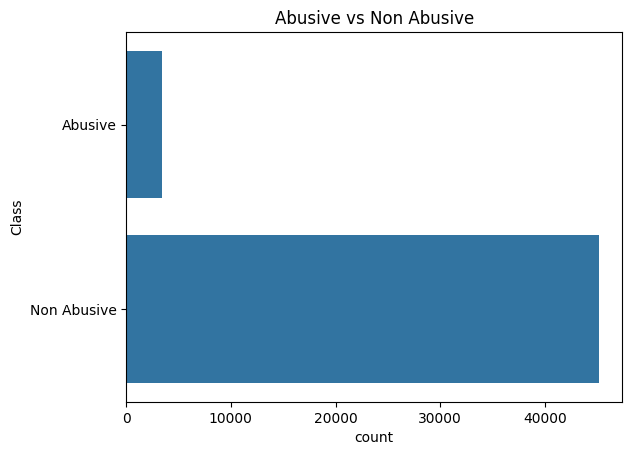

In [ ]:
sns.countplot(df['Class'])
plt.title('Abusive vs Non Abusive')
plt.show()

In [ ]:
print(df['Class'].value_counts())  # Print the counts of each unique value in the 'Class' column

Class
Non Abusive    45125
Abusive         3410
Name: count, dtype: int64


In [ ]:
x = df['clean_text']
vectorizer = TfidfVectorizer(max_features=5000)
x_tfidf = vectorizer.fit_transform(x)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
y = df['Class']

In [ ]:
# encoder = OneHotEncoder()
# encoded_labels = encoder.fit_transform(df[['Class']]).toarray()

# # Convert back to DataFrame and concatenate with the original DataFrame
# df_encoded = pd.DataFrame(encoded_labels, columns=encoder.get_feature_names_out(['Class']))
# df = pd.concat([df,df_encoded], axis=1)

# df.drop('Class', axis=1, inplace=True)


In [ ]:
df.head()

,filename,Message-ID,content,Class,clean_text
0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,eat shit john j lavoratoexcelr 11182000 0101 p...
1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,0,fuck
2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,0,gentleman follow champagn avail 70 approxim re...
3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,0,sorri ive taken longjust tri fend chick life s...
4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,asshol john j lavoratoexcelr 12232000 1051 joh...


In [ ]:
# # text convert numerical vectors using tf-idf

# vectorizer = TfidfVectorizer(max_features=5000)
# x_tfidf = vectorizer.fit_transform(df['clean_text']) # Changed 'x' to 'df['clean_text']' to use the preprocessed text data

In [ ]:
# x = x_tfidf
# y = np.argmax(df_encoded.values, axis=1)  # Convert one-hot encoding back to single labels

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:

lcf = LogisticRegression()
lcf.fit(x_train, y_train)
y_pred = lcf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy_score', acc * 100)

Accuracy_score 96.03379004841867


In [ ]:
print(pd.Series(y_pred).value_counts())

1    8693
0    1014
Name: count, dtype: int64


In [ ]:
# Import the 'classification_report' function
from sklearn.metrics import classification_report

print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.65      0.96      0.77       691
           1       1.00      0.96      0.98      9016

    accuracy                           0.96      9707
   macro avg       0.82      0.96      0.88      9707
weighted avg       0.97      0.96      0.96      9707



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

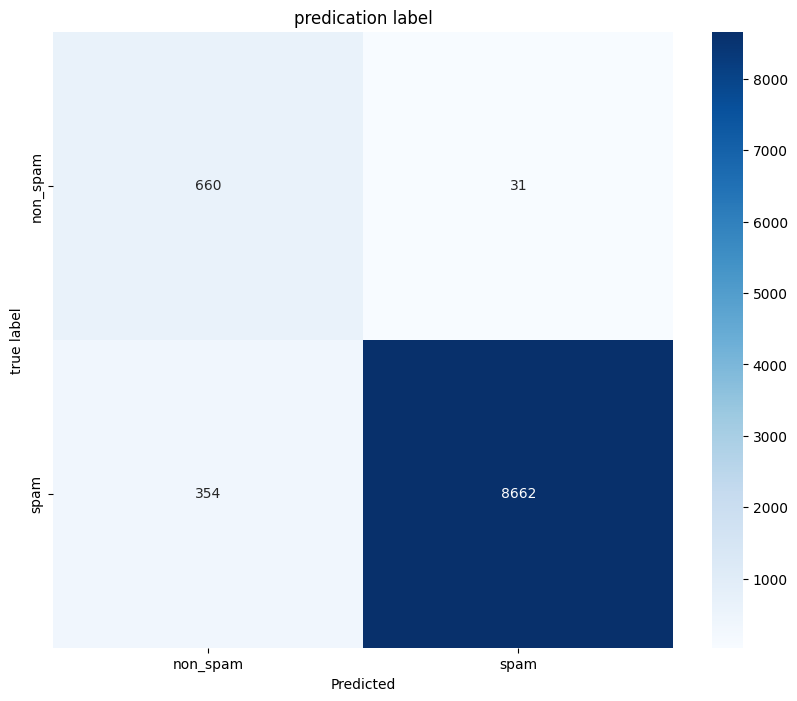

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["non_spam", "spam"], yticklabels=["non_spam", "spam"])
plt.title('predication label')
plt.ylabel('true label')
plt.xlabel('Predicted')
plt.show()

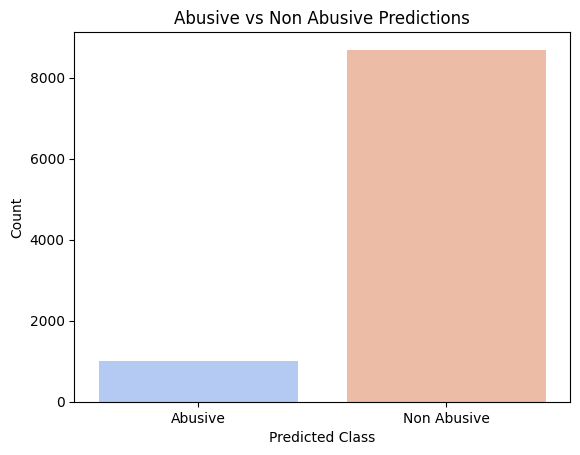

In [ ]:
# Count plot for predicted classes
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('Abusive vs Non Abusive Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Abusive', 'Non Abusive'])
plt.show()


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy_score', acc * 100)

Accuracy_score 98.36200679921706


In [ ]:
print(pd.Series(y_pred).value_counts())

1    8953
0     754
Name: count, dtype: int64


In [ ]:
print('Classification report:')
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       691
           1       0.99      0.99      0.99      9016

    accuracy                           0.98      9707
   macro avg       0.92      0.96      0.94      9707
weighted avg       0.98      0.98      0.98      9707



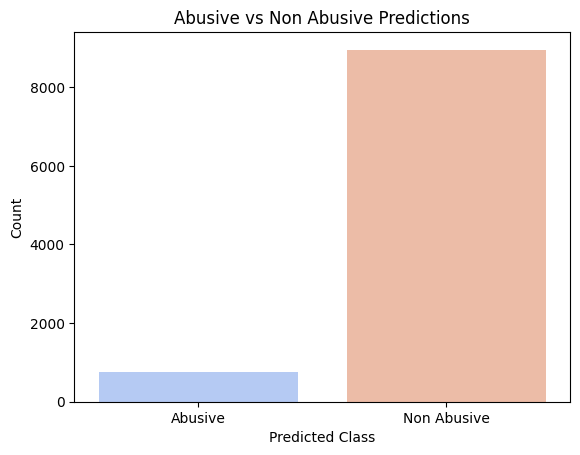

In [ ]:
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('Abusive vs Non Abusive Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Abusive', 'Non Abusive'])
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ran = RandomForestClassifier()
ran.fit(x_train, y_train)
y_pred = ran.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy_score', acc * 100)

Accuracy_score 99.02132481714226


In [ ]:
print('Classification report:')
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       691
           1       0.99      1.00      0.99      9016

    accuracy                           0.99      9707
   macro avg       0.98      0.94      0.96      9707
weighted avg       0.99      0.99      0.99      9707



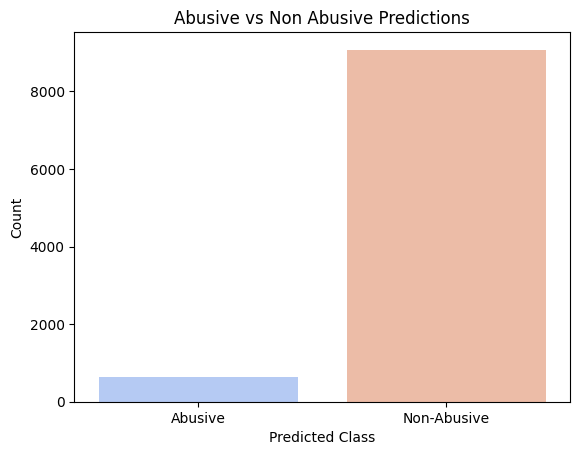

In [ ]:
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('Abusive vs Non Abusive Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Abusive', 'Non-Abusive'])
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dec = DecisionTreeClassifier()
dec.fit(x_train, y_train)
y_pred = dec.predict(x_test) # Changed x_text to x_test
acc = accuracy_score(y_test, y_pred)
print('Accurcay_score', acc * 100)

Accurcay_score 98.10446069846502


In [ ]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       691
           1       0.99      0.99      0.99      9016

    accuracy                           0.98      9707
   macro avg       0.92      0.95      0.93      9707
weighted avg       0.98      0.98      0.98      9707



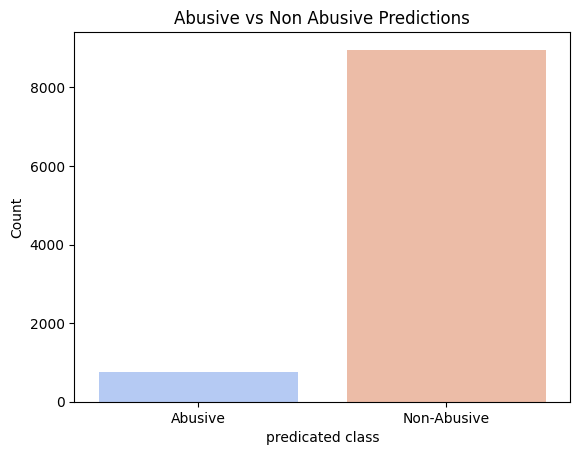

In [ ]:
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('Abusive vs Non Abusive Predictions')
plt.xlabel('predicated class')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Abusive', 'Non-Abusive'])
plt.show()

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy_score', acc * 100)

Accuracy_score 95.68352735139591


In [ ]:
print('Classification_report')
print(classification_report(y_test, y_pred))

Classification_report
              precision    recall  f1-score   support

           0       0.63      0.93      0.75       691
           1       0.99      0.96      0.98      9016

    accuracy                           0.96      9707
   macro avg       0.81      0.94      0.87      9707
weighted avg       0.97      0.96      0.96      9707



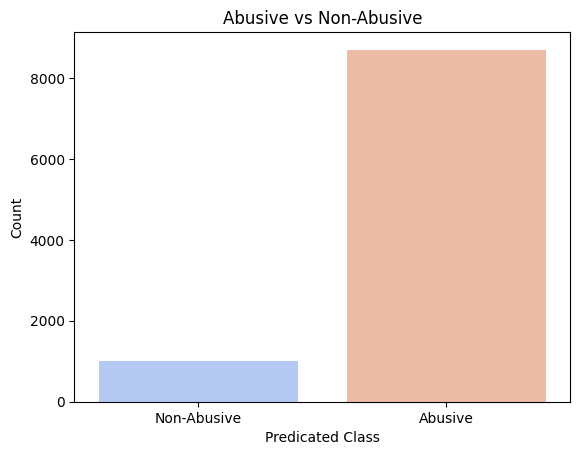

In [ ]:
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('Abusive vs Non-Abusive')
plt.xlabel('Predicated Class')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels = ['Non-Abusive', 'Abusive'])
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kne = KNeighborsClassifier()
kne.fit(x_train, y_train)
y_pred = kne.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy_score', acc * 100)

Accuracy_score 62.933965179767185


In [ ]:
print('Classifiation_report')
print(classification_report(y_test, y_pred))

Classifiation_report
              precision    recall  f1-score   support

           0       0.16      0.99      0.28       691
           1       1.00      0.60      0.75      9016

    accuracy                           0.63      9707
   macro avg       0.58      0.80      0.51      9707
weighted avg       0.94      0.63      0.72      9707



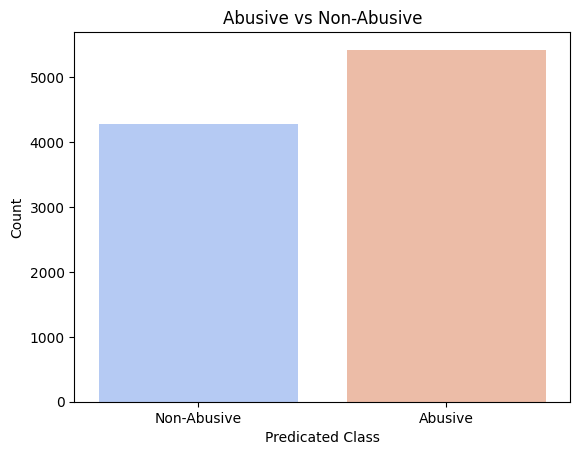

In [ ]:
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('Abusive vs Non-Abusive')
plt.xlabel('Predicated Class')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels = ['Non-Abusive', 'Abusive'])
plt.show()

In [ ]:
import pickle

In [ ]:
with open('Email.pkl', 'wb') as file:
   pickle.dump(ran, file)

In [ ]:
with open("TfidfVectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer, file)
